# **Ejercicio 1. Retrasos de primer orden y sistemas lineales**

1. **Retraso de primer orden y sus dos formulaciones**

Un retraso de primer orden es una estructura stock–flujo donde el flujo de salida es proporcional al stock con constante de tiempo $\tau$:

$$
\dot S(t)=\text{Entrada}(t)-\text{Salida}(t),\qquad
\text{Salida}(t)=\frac{S(t)}{\tau}.
$$

Esta estructura conserva unidades en los retrasos materiales y produce respuestas **exponenciales** a cambios en la entrada.

**Dos formulaciones equivalentes:**

- **Retraso material (stock–flujo explícito).** Conserva cantidades: la integral de la entrada coincide con la integral de la salida. Adecuado para colas, tránsito y procesos con elementos físicos.
- **Búsqueda de objetivo (retraso informacional / suavizado).** Una variable $X$ se ajusta hacia un objetivo $G$ con:

  $$
  \dot X=\frac{G-X}{\tau}.
  $$

  Es la estructura estándar de "goal seeking" en dinámica de sistemas.

2. **Seguimiento de flujo (salida = stock/retardo)**

**Regla:**

$$
\text{Salida}(t)=\frac{S(t)}{\tau}.
$$

Supone mezcla perfecta: cada unidad del stock tiene la misma probabilidad de salir por unidad de tiempo, implicando una distribución de tiempos de residencia exponencial (sin memoria).

3. **Búsqueda de objetivo (flujo = (objetivo − stock)/retardo)**

**Regla:**

$$
\text{Flujo de ajuste}=\frac{G-S}{\tau}.
$$

Cierra un lazo negativo que reduce la brecha $G-S$ exponencialmente con constante de tiempo $\tau$. Es equivalente a aplicar un retraso de primer orden al gap.

4. **Condición de equilibrio y ajuste exponencial**

En equilibrio estacionario se cumple:

$$
\dot S = 0 \quad \Rightarrow \quad \text{Entrada} = \text{Salida}.
$$

Con una nueva entrada constante, el stock se aproxima exponencialmente al nuevo equilibrio $S^{*}$:

$$
S(t) = S^{*} + (S_0 - S^{*}) \, e^{-t/\tau},
$$

donde:

$$
S^{*} = \text{Entrada} \cdot \tau.
$$

Tras un tiempo $\tau$, la brecha con respecto al equilibrio se reduce a $e^{-1} \approx 36.8\%$ (y el avance hacia el nuevo equilibrio alcanza aproximadamente $63.2\%$).

5. **Por qué los sistemas lineales permiten superposición**

Las ecuaciones diferenciales lineales (y, en particular, los sistemas LTI) satisfacen el principio de superposición: la respuesta a la suma de entradas es la suma de las respuestas individuales (aditividad y homogeneidad).

6. **Ejercicio**

**Datos:** $S_0=100$ unidades; **Entrada** $=5/\text{día}$; **retardo** $\tau=10$ días.

- Valor de equilibrio del stock

$$
S^{*} = \text{Entrada} \cdot \tau = 5 \times 10 = \boxed{50\ \text{unidades}}.
$$

En equilibrio:

$$
\text{Salida} = \frac{S^{*}}{\tau} = \frac{50}{10} = 5/\text{día}
$$

- Trayectoria del stock y de la salida

$$
S(t) = 50 + 50 \cdot e^{-t/10}
$$

$$
\text{Salida}(t) = \frac{S(t)}{10} = 5 + 5 \cdot e^{-t/10}
$$

Valores representativos:

- $t = 0$: $S = 100$, $\text{Salida} = 10/\text{día}$
- $t = 10$ días: $S \approx 68.39$, $\text{Salida} \approx 6.84/\text{día}$
- $t = 20$ días: $S \approx 56.77$, $\text{Salida} \approx 5.68/\text{día}$
- $t = 30$ días: $S \approx 52.49$, $\text{Salida} \approx 5.25/\text{día}$

Ambas se aproximan exponencialmente a sus valores de equilibrio con constante de tiempo $10$ días.


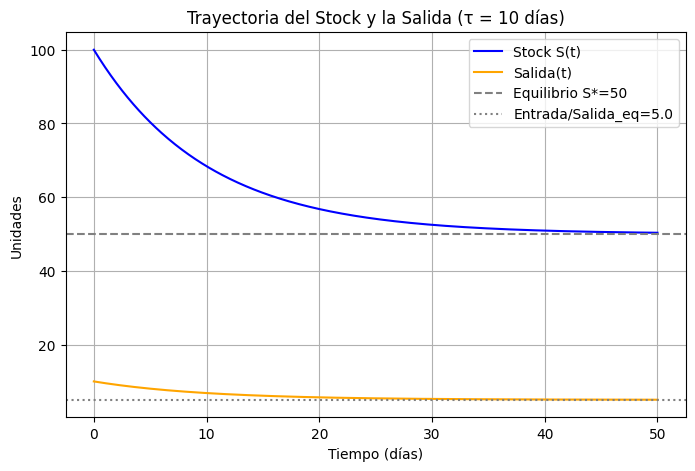

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
S0 = 100
tau = 10.0
entrada = 5.0
S_star = entrada * tau

# Vector de tiempos
t = np.linspace(0, 50, 501)  # desde 0 hasta 50 días

# Trayectoria del stock
S = S_star + (S0 - S_star) * np.exp(-t / tau)

# Salida
Salida = S / tau

# Crear figura
plt.figure(figsize=(8, 5))
plt.plot(t, S, label="Stock S(t)", color="blue")
plt.plot(t, Salida, label="Salida(t)", color="orange")
plt.axhline(S_star, color="gray", linestyle="--", label=f"Equilibrio S*={S_star:.0f}")
plt.axhline(
    entrada, color="gray", linestyle=":", label=f"Entrada/Salida_eq={entrada:.1f}"
)
plt.xlabel("Tiempo (días)")
plt.ylabel("Unidades")
plt.title("Trayectoria del Stock y la Salida (τ = 10 días)")
plt.legend()
plt.grid(True)
plt.show()

- Retrasos **sin memoria** vs. **por etapas** (Erlang / _DELAY N_)

- **Sin memoria (1.º orden, exponencial).** El tiempo de residencia es exponencial con riesgo constante la probabilidad de salida futura no depende del tiempo ya permanecido. Útil cuando el stock está bien mezclado y el “peligro de salida” por unidad de tiempo es aproximadamente constante.
- **Por etapas (orden $N$, cascada; distribución de Erlang).** Se modela como $N$ retrasos de 1.º orden en serie con media total $\tau$; a mayor $N$ la varianza disminuye (salida más concentrada en torno a la media). Apropiado para procesos con fases sucesivas de duración similar (p. ej., cadenas de envejecimiento).

## Relaciones entre los retrasos

- El retraso de 1.º orden fundamenta el seguimiento de flujo ($\text{Salida}=S/\tau$) y el ajuste exponencial al equilibrio: ambas expresiones derivan de la misma ODE stock–flujo.
- La búsqueda de objetivo es algebraicamente equivalente a un retraso de 1.º orden aplicado a la brecha $G - X$ (donde **$G$** representa la eta o consigna deseada y **$X$** es el valor actual de la variable que se ajusta).  
  Por eso comparte la misma constante de tiempo y la misma forma exponencial en su respuesta.

- La superposición permite descomponer entradas (escalón, rampa, pulsos) y sumar respuestas en estas estructuras lineales (LTI), simplificando el análisis.
- Elegir entre exponencial (sin memoria) y Erlang (en etapas) mantiene la media $\tau$ pero cambia la dispersión de tiempos de salida; usa exponencial para mezcla perfecta y Erlang para procesos con fases y menor variabilidad.


# Práctica


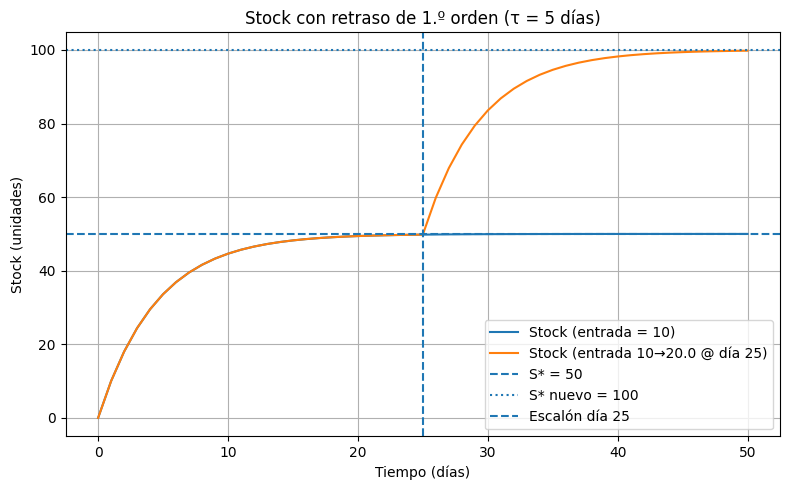

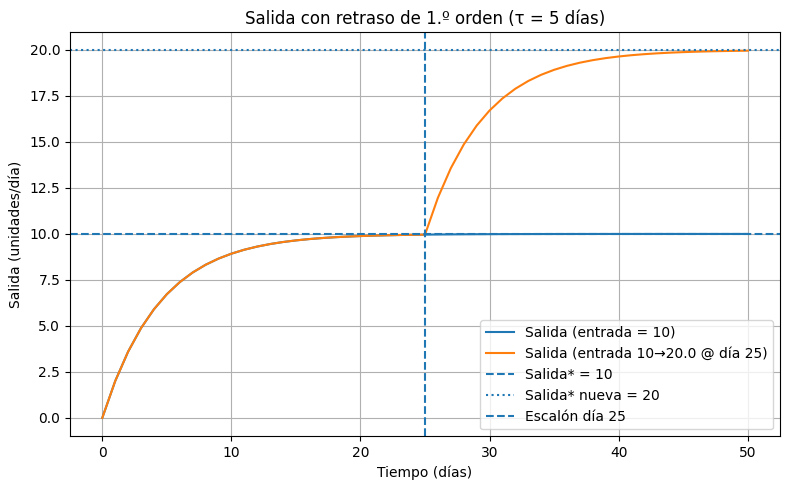

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parámetros principales ---
dt = 1.0  # paso (días)
t_end = 50  # horizonte (días)
tau = 5.0  # τ: retardo / tiempo de residencia (días)
S0 = 0.0  # stock inicial

inflow_base = 10.0  # entrada constante base (u/día)
use_step = True  # activar cambio escalón
t_step = 25  # día del escalón
inflow_after = 20.0  # entrada tras el escalón (u/día)

t = np.arange(0, t_end + dt, dt)

inflow_const = np.full_like(t, inflow_base, dtype=float)
inflow_step = np.full_like(t, inflow_base, dtype=float)
if use_step:
    inflow_step[t >= t_step] = inflow_after


def simulate_first_order(inflow, S0, tau, dt):
    """Euler explícito para el retraso de 1.º orden."""
    n = len(inflow)
    S = np.zeros(n)
    Out = np.zeros(n)
    S[0] = S0
    Out[0] = S0 / tau
    for k in range(1, n):
        Out[k - 1] = S[k - 1] / tau
        S[k] = S[k - 1] + (inflow[k - 1] - Out[k - 1]) * dt
    Out[-1] = S[-1] / tau
    return S, Out


S_const, Out_const = simulate_first_order(inflow_const, S0, tau, dt)
S_step, Out_step = simulate_first_order(inflow_step, S0, tau, dt)

# Equilibrios teóricos: S* = Entrada·τ,  Salida* = Entrada
S_star_base, Out_star_base = inflow_base * tau, inflow_base
S_star_step, Out_star_step = inflow_after * tau, inflow_after

# --- Gráfico: STOCK ---
plt.figure(figsize=(8, 5))
plt.plot(t, S_const, label="Stock (entrada = 10)")
if use_step:
    plt.plot(t, S_step, label=f"Stock (entrada 10→{inflow_after} @ día {t_step})")
plt.axhline(S_star_base, linestyle="--", label=f"S* = {S_star_base:.0f}")
if use_step:
    plt.axhline(S_star_step, linestyle=":", label=f"S* nuevo = {S_star_step:.0f}")
    plt.axvline(t_step, linestyle="--", label=f"Escalón día {t_step}")
plt.title("Stock con retraso de 1.º orden (τ = 5 días)")
plt.xlabel("Tiempo (días)")
plt.ylabel("Stock (unidades)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Gráfico: SALIDA ---
plt.figure(figsize=(8, 5))
plt.plot(t, Out_const, label="Salida (entrada = 10)")
if use_step:
    plt.plot(t, Out_step, label=f"Salida (entrada 10→{inflow_after} @ día {t_step})")
plt.axhline(Out_star_base, linestyle="--", label=f"Salida* = {Out_star_base:.0f}")
if use_step:
    plt.axhline(
        Out_star_step, linestyle=":", label=f"Salida* nueva = {Out_star_step:.0f}"
    )
    plt.axvline(t_step, linestyle="--", label=f"Escalón día {t_step}")
plt.title("Salida con retraso de 1.º orden (τ = 5 días)")
plt.xlabel("Tiempo (días)")
plt.ylabel("Salida (unidades/día)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Gráfico del stock.** Veo que el stock parte en 0 y asciende suavemente hacia el primer equilibrio en $S^{*}=50$, consistente con una entrada de 10 u/día y $\tau=5$ (pues $S^{*}=10\cdot5$). En el día 25 identifico el escalón de la entrada a 20 u/día (línea vertical) y, desde ese punto, observo que el stock retoma una subida exponencial hasta aproximarse al nuevo equilibrio $S^{*}=100$ (línea punteada). Sé que, por tratarse de un retraso de primer orden, a los 5 días del cambio (alrededor del día 30) el stock recorre cerca del $63.2 %$ del salto $50\rightarrow100$, lo que coincide con la curvatura mostrada.

**Gráfico de la salida.** Percibo que la salida arranca en 0 u/día (porque el stock inicia en 0) y converge gradualmente a 10 u/día igualando a la entrada en equilibrio. Cuando en el día 25 la entrada salta a 20 u/día, la salida no cambia de golpe: aumenta suavemente con la misma constante de tiempo $\tau=5$ hasta acercarse a 20 u/día. A los 5 días posteriores al escalón la salida ya cubrió alrededor del $63.2 %$ del cambio $10\rightarrow20$ (≈$16.3$ u/día), confirmando la relación $\text{Salida}=S/\tau$ y que en equilibrio siempre se cumple $\text{Entrada}=\text{Salida}$


## Ejercicio 2

## Teoría

1. Retrasos en la retroalimentación y generación de oscilaciones
Cuando un sistema corrige basándose en mediciones que llegan tarde, la acción correctiva siempre está desfasada respecto al estado real. Por ejemplo, si un termostato tarda mucho en registrar la temperatura antes de ajustar la calefacción, continuará calentando aunque ya se haya alcanzado el punto deseado, lo que después provoca un enfriamiento excesivo y así sucesivamente, dando lugar a ciclos de sobrecalentamiento y enfriamiento alternados. 

2. Por qué un lazo de balance con demora produce sobreimpulso y déficit
En un bucle cuyo propósito es mantener un valor concreto, cualquier demora en aplicar la corrección implica que el sistema acumula error durante ese lapso. Al llegar la señal de ajuste, se reacciona con demasiada intensidad (sobreimpulso), y luego, al corregir ese exceso, se cae por debajo del punto objetivo (insuficiencia). Este efecto hace que el sistema oscile alrededor de la meta, ya sea de forma amortiguada o persistente. 

3. Ejemplos prácticos de oscilaciones por delay

    - Ciclos económicos: Las autoridades monetarias suelen intervenir meses después de detectar variaciones en la inflación, lo que genera expansiones y contracciones repetitivas de la economía.

    - Gestión de pandemias: Las medidas sanitarias se imponen o relajan tras un lapso, provocando picos y descensos sucesivos de contagios. 

4. Caso: objetivo = 100, demora de percepción = 20 días
    
    a. Tamaño del sobreimpulso: con un desfase equivalente a la mitad del plazo de ajuste, el sistema suele alcanzar alrededor de un 150 % del valor pretendido antes de corregir a la baja.
    
    b. Ventaja de reducir el retardo de medición: acortar el tiempo de muestreo minimiza la diferencia entre la señal real y la usada para la retroalimentación, lo cual atenúa las oscilaciones y acelera la aproximación al valor deseado. 

## Práctica

Simulación de un stock con retraso de percepción y su efecto oscilatorio

1. Concepto: Usaremos un modelo de Euler en tiempo discreto y aplicaremos un filtro tipo Erlang para representar el delay.

2. Pasos esenciales:

    - Definir un intervalo de tiempo (por ejemplo, 1 día) y un horizonte total (p. ej., 200 días).

    - Crear el kernel de Erlang con el orden deseado y normalizarlo.

    - Iterar en cada paso:

        1. Calcular la percepción retrasada aplicando convolución discreta del historial del stock con el kernel.

        2. Determinar el flujo correctivo como la diferencia entre la meta y la señal percibida, dividida por el retardo.

        3. Actualizar el stock real por integración de Euler.

    - Graficar ambos: el stock real y la señal percibida, junto a la línea del objetivo.

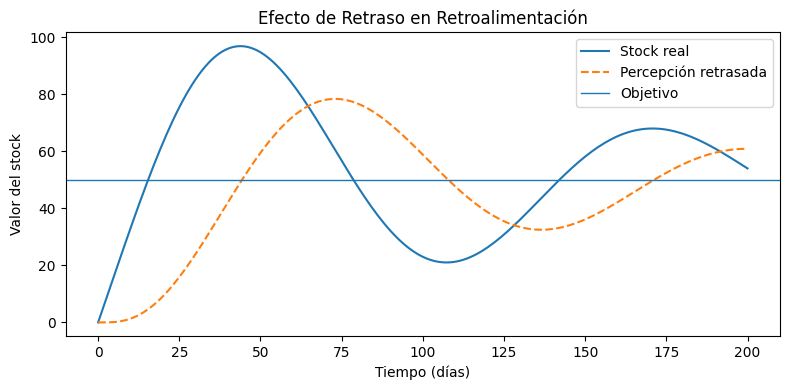

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Parámetros de simulación
dt = 1.0            # paso (días)
T  = 200            # duración total (días)
t  = np.arange(0, T+dt, dt)
objetivo = 50.0     # nivel deseado
demora = 15         # días de retraso
k = 2               # orden de Erlang

# Construcción del kernel de Erlang usando math.factorial
kernel = (t**(k-1) * np.exp(-t/demora) /
          (demora**k * math.factorial(k-1)))
kernel /= kernel.sum() * dt

# Inicialización de vectores
real = np.zeros_like(t)
perc = np.zeros_like(t)

for i in range(1, len(t)):
    perc[i] = np.dot(real[:i], kernel[i-1::-1]) * dt
    tasa = (objetivo - perc[i]) / demora
    real[i] = real[i-1] + tasa * dt

# Visualización
plt.figure(figsize=(8, 4))
plt.plot(t, real, label='Stock real')
plt.plot(t, perc, '--', label='Percepción retrasada')
plt.axhline(objetivo, linewidth=1, label='Objetivo')
plt.xlabel('Tiempo (días)')
plt.ylabel('Valor del stock')
plt.title('Efecto de Retraso en Retroalimentación')
plt.legend()
plt.tight_layout()
plt.show()

## Ejercicio 3

## Teoría
### 1. Comparación: Sistemas lineales vs. no lineales

- **Definición de sistema lineal:**
  - Sistema en el que la variable dependiente y sus derivadas aparecen solo en términos lineales. Por ejemplo la EDO: 
  
    $$ r(t)x'(t)+p(t)x(t) = q(t)$$

    En donde $r(t)$, $p(t)$ y $q(t)$ son funciones que dependen solo de la variable independiente $t$. La característica principal de los sistemas lineales es que cumplen con la superposición, es decir, la suma de dos soluciones es también una solución.

    En el Modelo SIR, el termino de recuperación es lineal, $\mu I$. depende de la variable $I$ sin productos, ni funciones no lineales. Por lo tanto, cumple con la homogeneidad y aditividad. Sí se duplican los infectados, la recuperación también se duplica.

- **Definición de sistema no lineal:**
  - Sistema en el que la variable dependiente y sus derivadas aparecen en términos no lineale, es decir como productos, potencias , funciones trigonométricas, etc. 

    $$ y´(t) = f(y(t), t)$$

    En donde $f(y(t), t)$ es una función no lineal de y. La superposición no se cumple en estos sistemas.

    En el Modelo SIR, el término de infectación es no lineal, $\Beta S I$ es el producto de dos variables de estado dependientes, haciendo que el sistema sea no lineal. La tasa de infectados no es proporcional ni A $s$ NI A $I$ por separado sino a la interacción entre ambas variables.

    Esto permire moderlar comportamientos complejos que no pueden ser representados por sistemas linealeS como picos , equilibrios e oscilaciones. Esta no linealidad es responable de fenómenos como la explosión inicial o el decrecimiento de casos.

---

### 2. Fuerza de infección (λ = βcI/N) y su doble interpretación

- **Definición de fuerza de infección ($\lambda$):**
  - La fuerza de infección representa la tasa instantánea a la que los individuos susceptibles adquieren la infección. Se define como:
  \begin{equation}
  \lambda = \Beta  \frac{cI}{N}
  \end{equation}

  Donde:
  - $\Beta$ es la tasa de transmisión.
  - $c$ es el contacto por unidad de tiempo.
  - $I$ es el número de infectados.
  - $N$ es el tamaño de la población.

  En el modelo SIR se agrupa $\Beta c$ como una sola constante $\Beta$. Resultando en $\lambda = \Beta \frac{I}{N}$.

- **Interpretaciones:**
  - a) **Riesgo por susceptibilidad:**
    - $\lambda$ representa el riesgo de infección que experimenta un individuo susceptible en un momento dado. Si una persona es está en una población en donde hay $I$ infectados, la probabilidad de que se infecte es $\lambda$. Esto depende de la prevalencia de los infectados como la intensidad y transmisión del agente infeccioso.
    -
  - b) **Tasa de propagación por infección:**
      - $\lambda S$ es la tasa total de nuevos infectados en un momento dado. En el modelo SIR, $S$ es la población susceptible, por lo que $\lambda S$ representa la tasa de nuevos infectados.  En SIR $ \lambda = \Beta \frac{I}{N}$ multiplica el número de susceptibles por lo que el número de infectados nuevos es proporcional a el número de susceptibles.

---



### 3. Razón por la que sistemas no lineales requieren simulación

- La ausencia de procesos sistemáticos que permitan encontrar la solución exacta a un problema.
- Estas ecuaciones generan comportamientos complejos que complican la obtención de formulas cerradas. 
-  Suelen depender fuertemente de las condiciones iniciales y pequeños cambios pueden producir grandes diferencias en la evolución del sistema, haciendo imposible la generalización de soluciones analíticas.
- La simulación numérica se convierte en la herramienta fundamental para estudiar y predecir el comportamiento de estos sistemas.

---



### 4. Modelo SIR con R₀ = 3

#### a. ¿Qué es R₀?

- $R_0$ es la número básico de reproducción, que representa el número promedio de casos secundarios por caso primario en una población completamente susceptible.

  Para el modelo SIR:

  - $R_0 = \frac{\beta N}{\alpha}$

  En donde:

  - $\beta$ es la tasa de contagio.
  - $N$ es la población total.
  - $\alpha$ es la tasa de recuperación.

  Si su valor es mayor a 1, el virus puede provocar una epidemia. Si es menor a 1, la infección tiende a desaparecer. 
#### b. Umbral de inmunidad de grupo

  Se define como la proporción mínima de la población que debe ser inmune para evitar la propagación de la enfermedad. 
  -  Formula:
 $$ TH = 1- \frac{1}{R_0} $$

  Sí $R_0 = 3$, entonces $TH = 1- \frac{1}{3} = \frac{2}{3} = 0.6667$.
  Al menos el 66.67% de la población debe ser inmune para evitar la propagación de la enfermedad.



#### c. Curvas epidémicas esperadas para S, I, R



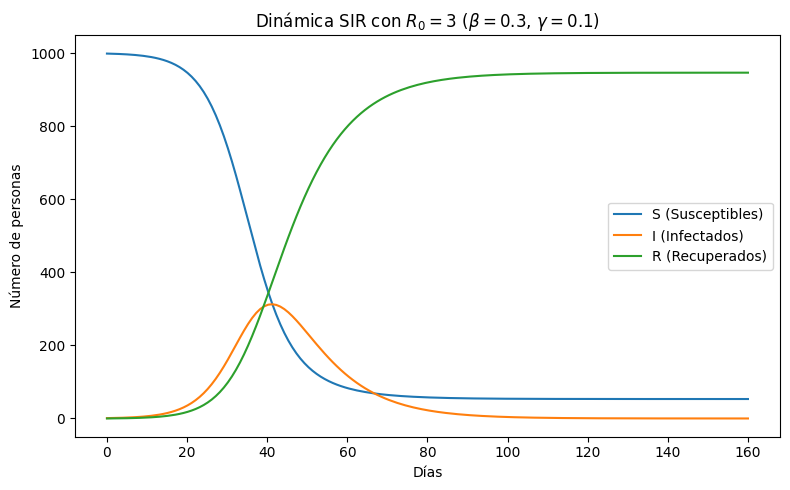

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000        
I0 = 1         
R0 = 0          
S0 = N - I0 - R0
beta = 0.3      
gamma = 0.1     
dias = 160      
t = np.linspace(0, dias, dias)

def sir(y, beta, gamma, N):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

S, I, R = [S0], [I0], [R0]
dt = 1.0
for _ in range(1, dias):
    dS, dI, dR = sir((S[-1], I[-1], R[-1]), beta, gamma, N)
    S.append(S[-1] + dS*dt)
    I.append(I[-1] + dI*dt)
    R.append(R[-1] + dR*dt)


plt.figure(figsize=(8,5))
plt.plot(t, S, label='S (Susceptibles)')
plt.plot(t, I, label='I (Infectados)')
plt.plot(t, R, label='R (Recuperados)')
plt.xlabel('Días')
plt.ylabel('Número de personas')
plt.title('Dinámica SIR con $R_0=3$ ($\\beta=0.3$, $\\gamma=0.1$)')
plt.legend()
plt.tight_layout()
plt.show()


### Práctica


### Definición del sistema SIR

In [20]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

N = 1000
S0, I0, R0 = 990, 10, 0
beta = 0.3
mu = 0.1
t_max = 100
t_eval = np.arange(0, t_max+1, 1)

def sir(t, y):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - mu * I
    dRdt = mu * I
    return [dSdt, dIdt, dRdt]

sol = solve_ivp(sir, [0, t_max], [S0, I0, R0], t_eval=t_eval)
S, I, R = sol.y

### Vacunación 

In [21]:
def sir_vac(t, y):
    S, I, R = y
    if int(t) == 30 and not hasattr(sir_vac, 'vacunado'):
        vacunar = S * 0.5
        S -= vacunar
        R += vacunar
        sir_vac.vacunado = True
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - mu * I
    dRdt = mu * I
    return [dSdt, dIdt, dRdt]
sir_vac.vacunado = False
sol_vac = solve_ivp(sir_vac, [0, t_max], [S0, I0, R0], t_eval=t_eval)
S_vac, I_vac, R_vac = sol_vac.y
I_vac_max = np.max(I_vac)
t_Ivac_max = t_eval[np.argmax(I_vac)]


### Graficos

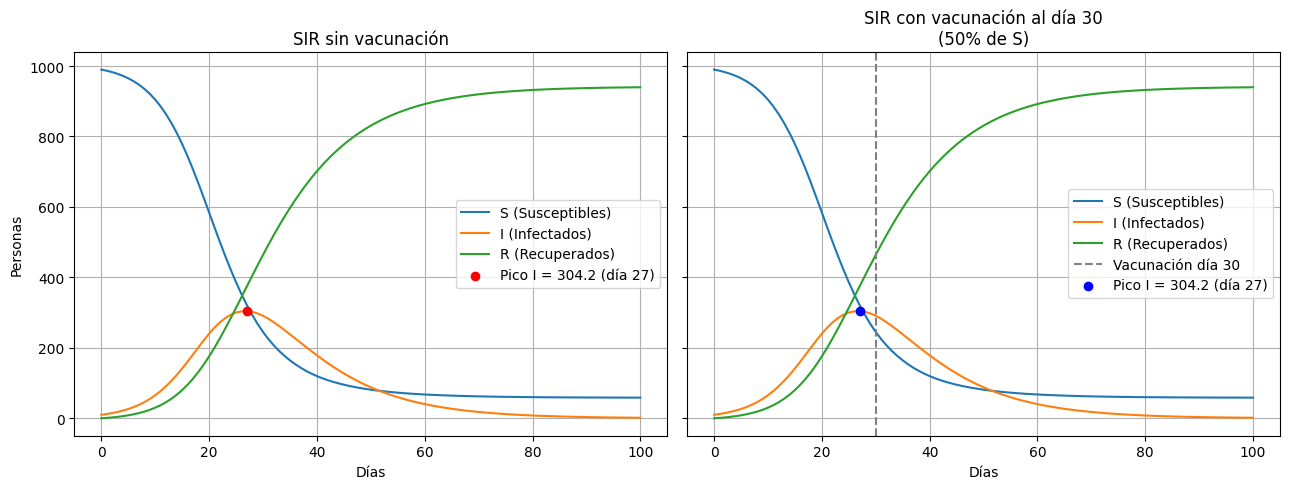

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(13,5), sharey=True)

axes[0].plot(t_eval, S, label="S (Susceptibles)")
axes[0].plot(t_eval, I, label="I (Infectados)")
axes[0].plot(t_eval, R, label="R (Recuperados)")
axes[0].scatter([t_Imax], [I_max], color='red', zorder=5, label=f"Pico I = {I_max:.1f} (día {t_Imax})")
axes[0].set_title("SIR sin vacunación")
axes[0].set_xlabel("Días")
axes[0].set_ylabel("Personas")
axes[0].legend()
axes[0].grid(True)

axes[1].plot(t_eval, S_vac, label="S (Susceptibles)")
axes[1].plot(t_eval, I_vac, label="I (Infectados)")
axes[1].plot(t_eval, R_vac, label="R (Recuperados)")
axes[1].axvline(x=30, linestyle='--', color='gray', label="Vacunación día 30")
axes[1].scatter([t_Ivac_max], [I_vac_max], color='blue', zorder=5, label=f"Pico I = {I_vac_max:.1f} (día {t_Ivac_max})")
axes[1].set_title("SIR con vacunación al día 30\n(50% de S)")
axes[1].set_xlabel("Días")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

- El modelo SIR sin vacunación y el modelo con vacunación masiva realizada el día 30 demuestra que el momento de la intervención es crucial para modificar la dinámica epidémica. 
- En ambos escenarios, el pico de infectados ocurre exactamente el mismo día y alcanza el mismo valor máximo, ya que la vacunación fue aplicada después de que la epidemia ya había alcanzado su punto crítico. 
- Intervenir una vez que el brote ya ha explotado tiene un impacto limitado sobre la propagación y el número máximo de casos activos.
- Para aplanar la curva y reducir la carga máxima sobre el sistema de salud, las estrategias de vacunación o control deben implementarse antes del pico epidémico y de manera temprana en el curso de la epidemia.



# Referencias

- Ventana Systems, Inc. (s. f.). DELAY1 & DELAY1I. https://www.vensim.com/documentation/fn_delay1.html
- Ventana Systems, Inc. (s. f.-b). Material and Information Delays. https://www.vensim.com/documentation/mgu09_material_and_information_delays.html
- Ventana Systems, Inc. (s. f.-c). SMOOTH. https://www.vensim.com/documentation/20480.html
  Siddiqi, A. (2011). Introduction to Engineering. https://ocw.mit.edu/courses/esd-00-introduction-to-engineering-systems-spring-2011/85603d5fc80f4c996a56b29e03460166_MITESD_00S11_lec03.pdf
- Ventana Systems, Inc. (s. f.-a). DELAY n. https://www.vensim.com/documentation/fn_delay_n.html
- MIT OpenCourseWare. (2011). *18.03SC Differential Equations: Linear vs Nonlinear Systems* [Lecture notes]. Massachusetts Institute of Technology. http://ocw.mit.edu

- Railsback, S. F., & Grimm, V. (2019). *Agent-Based and Individual-Based Modeling: A Practical Introduction* (2nd ed.). Princeton University Press.

- Zeigler, B. P., Muzy, A., & Kofman, E. (2018). *Theory of Modeling and Simulation: Discrete Event and Iterative System Computational Foundations* (3rd ed.). Academic Press.

- Sterman, J. D. (2000). *Business Dynamics: Systems Thinking and Modeling for a Complex World*. Irwin/McGraw-Hill.

- Brauer, F., Castillo-Chavez, C., & Feng, Z. (2019). *Mathematical Models in Epidemiology*. Springer.